In [1]:
#Decision Trees

In [113]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split

In [114]:
df1_train=pd.read_csv(r"C:\Users\vkatepally\Decision_Tree\train.csv")

In [115]:
df1_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
df1_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [117]:
df1_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [118]:
#Removing the cabin  and age columns because most of teh data is mising
df1=df1_train.drop(axis=1,labels=["Cabin"])

In [119]:
imp=Imputer(missing_values='NaN',strategy='mean')
df1['Age'] = imp.fit_transform(df1['Age'].values.reshape(-1,1))

In [120]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [105]:
#df1=df1.infer_objects()
#df1['Embarked']=df1['Embarked'].astype('string')
#print(df1.dtypes)
#imp=Imputer(missing_values='NaN',strategy="most_frequent")
#df1['Embarked']=imp.fit_transform(df1["Embarked"].values.reshape(-1,1))

In [123]:
df1.dtypes
#sex feature is object convert it to category
df1['Sex']=df1['Sex'].astype('category')
print(df1.dtypes)

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked         object
dtype: object


In [125]:
#convert sex feature to numeric
#this also can be done using label encoder of scikit learn
#df1['Sex'][df1.Sex=='female']=1
#df1['Sex'][df1.Sex=='male']=0
from sklearn import preprocessing
print(df1['Sex'].value_counts())
le=preprocessing.LabelEncoder()

df1['Sex']=le.fit_transform(df1['Sex'])
#le.inverse_transform(['female','male'])
print(df1['Sex'].unique())



1    577
0    314
Name: Sex, dtype: int64
[1 0]


In [126]:
columns = ['Pclass','Sex','Age','Fare','Parch','SibSp']
X=df1[columns]
y=df1['Survived']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train
#y_train

In [181]:

from sklearn.tree import  DecisionTreeClassifier
#here all the parameters are default
#criterion:default -gini
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
print("Accuracy score using gini criterion of train data", clf.score(X_train,y_train))
print("Accuracy score using gini criterion of test data", clf.score(X_test,y_test))
#print(clf.score(X_test,y_test))

#using the criteruion as entropy and check if there is increase in accuracy
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)
print("Accuracy score using entropy criterion of train data", clf.score(X_train,y_train))
print("Accuracy score using entropy criterion of test data", clf.score(X_test,y_test))


Accuracy score using gini criterion of train data 0.9803370786516854
Accuracy score using gini criterion of test data 0.7597765363128491
Accuracy score using entropy criterion of train data 0.9803370786516854
Accuracy score using entropy criterion of test data 0.770949720670391


# max_features : int, float, string or None, optional (default=None)
    The number of features to consider when looking for the best split:

        - If int, then consider `max_features` features at each split.
        - If float, then `max_features` is a percentage and
          `int(max_features * n_features)` features are considered at each
          split.
        - If "auto", then `max_features=sqrt(n_features)`.
        - If "sqrt", then `max_features=sqrt(n_features)`.
        - If "log2", then `max_features=log2(n_features)`.
        - If None, then `max_features=n_features`.

6


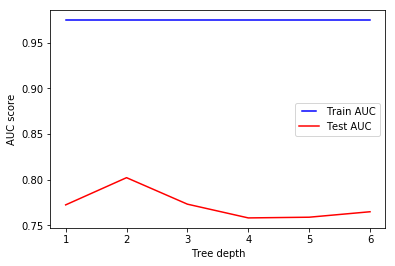

In [215]:
import matplotlib.pyplot as plt
from sklearn.metrics import *
#fine tuning the hyper parameters
print((len(columns)))
train_score=[]
test_score=[]
auc_train=[]
auc_test=[]
#max_features=range(len(columns)-1)
max_features=np.arange(1,len(columns)+1,1)
for i in max_features:
    clf=DecisionTreeClassifier(criterion='entropy',max_features=i)
    clf.fit(X_train,y_train)
    
    train_pred=clf.predict(X_train)
    fpr_train,tpr_train,a_train=roc_curve(y_train,train_pred)
    auc_train.append(auc(fpr_train,tpr_train))
    
    
    
    test_pred=clf.predict(X_test)
    fpr_test,tpr_test,a_test=roc_curve(y_true=y_test,y_score=test_pred)
    auc_test.append(auc(fpr_test,tpr_test))
    
    
    train_score.append(clf.score(X_train,y_train))
    test_score.append(clf.score(X_test,y_test))
   
    #print("number of features",i+1)
    #print("Accuracy score using gini criterion of train data", clf.score(X_train,y_train))
    #print("Accuracy score using gini criterion of test data", clf.score(X_test,y_test))



from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, auc_train, 'b', label='Train AUC')
line2, = plt.plot(max_features, auc_test, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()
    
#plt.plot(max_features,train_score)
#plt.plot(max_features,test_score)
#plt.xlabel("max_features")
#plt.ylabel('Accuracy')
#plt.lab("training_score","test_score")
    
#for i in range(len(columns)-1)


#clf=DecisionTreeClassifier(criterion='entropy',max_features=)
#clf.fit(X_train,y_train)
#print("Accuracy score using gini criterion", clf.score(X_test,y_test))

# max_depth : int or None, optional (default=None)
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

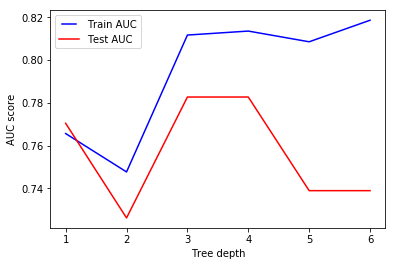

In [216]:
max_depth=np.arange(1,7,1)

train_score=[]
test_score=[]
auc_train=[]
auc_test=[]
for i in max_depth:
    clf=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    clf.fit(X_train,y_train)
    
    train_pred=clf.predict(X_train)
    fpr_train,tpr_train,a_train=roc_curve(y_train,train_pred)
    auc_train.append(auc(fpr_train,tpr_train))
    
    
    
    test_pred=clf.predict(X_test)
    fpr_test,tpr_test,a_test=roc_curve(y_true=y_test,y_score=test_pred)
    auc_test.append(auc(fpr_test,tpr_test))
    
    
    train_score.append(clf.score(X_train,y_train))
    test_score.append(clf.score(X_test,y_test))
   
    #print("number of features",i+1)
    #print("Accuracy score using gini criterion of train data", clf.score(X_train,y_train))
    #print("Accuracy score using gini criterion of test data", clf.score(X_test,y_test))



from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, auc_train, 'b', label='Train AUC')
line2, = plt.plot(max_depth, auc_test, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()


[0.20347089 0.43083098 0.15783874 0.15267719 0.00447731 0.05070488]


<BarContainer object of 6 artists>

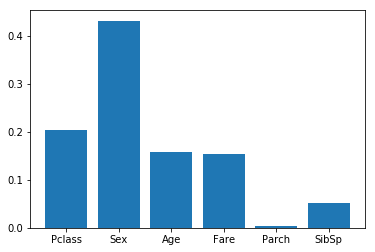

In [219]:
#feature importance
print(clf.feature_importances_)
plt.bar(columns,clf.feature_importances_)